Purpose of this notebook is to examine stop words.

In [2]:
# imports - basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imports modeling
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# read in EDA cleaned file
df = pd.read_csv('../CommentFiles/Comments_EDA_Final.csv')

In [4]:
# check classes
df['subreddit'].value_counts(normalize=True)

dfsports      0.501993
sportsbook    0.498007
Name: subreddit, dtype: float64

In [5]:
# convert subreddit into binary labels
df['subreddit'] = df['subreddit'].map({'sportsbook': 1, 'dfsports': 0})

In [6]:
# Instantiate CountVectorizer
cvec = CountVectorizer()

In [7]:
# Fit and transform data sets
body_cvec = cvec.fit_transform(df['body'])

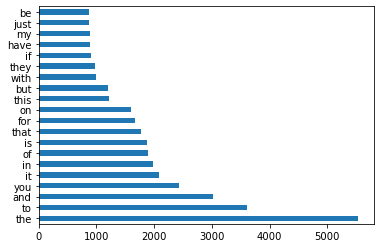

In [8]:
# check for top occuring words
# convert X_train to df
body_cvec_df = pd.DataFrame(body_cvec.todense(), columns=cvec.get_feature_names())
# plot top occuring words; top 20
body_cvec_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

## Annotation:
Top 20 occurring words seems to be very common words, found in sklearn's stopwords. From here I will create list of stop words to add to english stop words.

In [9]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words='english')

In [10]:
# Fit and transform data sets
body_cvec = cvec.fit_transform(df['body'])

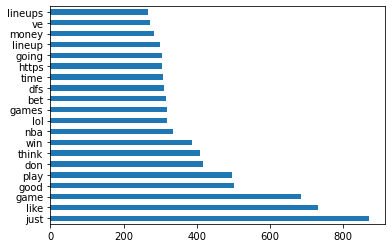

In [11]:
# check for top occuring words
# convert X_train to df
body_cvec_df = pd.DataFrame(body_cvec.todense(), columns=cvec.get_feature_names())
# plot top occuring words; top 20
body_cvec_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

Add https and lol to stop list with other common words.  
https, lol, just, and like

In [12]:
# print english stop words to get list
print(CountVectorizer(stop_words='english').get_stop_words())

frozenset({'cant', 'me', 'forty', 'them', 'describe', 'none', 'every', 'anyone', 'down', 'this', 'who', 'whom', 'are', 'nothing', 'twenty', 'whenever', 'seem', 'ever', 'amoungst', 'so', 'some', 'hasnt', 'too', 'hereby', 'sixty', 'her', 'do', 'yet', 'anyway', 'everywhere', 'get', 'next', 'to', 'with', 'made', 'four', 'thereby', 'whither', 'along', 'cry', 'through', 'were', 'well', 'de', 'back', 'within', 'besides', 'same', 'moreover', 'whereby', 'become', 'third', 'of', 'still', 'thereafter', 'they', 'his', 'eg', 'am', 'else', 'whereafter', 'at', 'sometimes', 'keep', 'first', 'only', 'thence', 'is', 'five', 'sincere', 'behind', 'had', 'indeed', 'where', 'whereupon', 'latter', 'has', 'once', 'amount', 'myself', 'somewhere', 'themselves', 'if', 'under', 'meanwhile', 'or', 'among', 'six', 'then', 'what', 'couldnt', 'from', 'enough', 'until', 'such', 'above', 'top', 'eleven', 'nor', 'while', 'should', 'fire', 'though', 'interest', 'beside', 'part', 'yourself', 'becoming', 'any', 'we', 'was'

In [13]:
# create custom stop words list to add custom words to from english stop words
custom_stop_words = []
for word in CountVectorizer(stop_words='english').get_stop_words():
    custom_stop_words.append(word)

In [14]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words=custom_stop_words)

In [15]:
# Fit and transform data sets
body_cvec = cvec.fit_transform(df['body'])

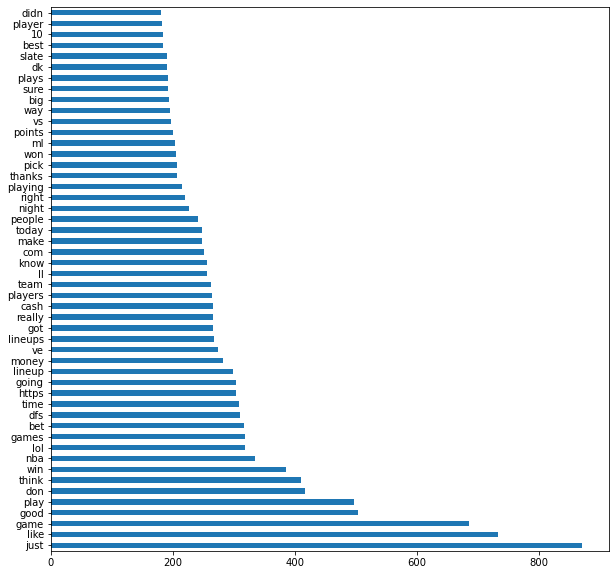

In [16]:
# check for top occuring words without stop words
body_cvec_df = pd.DataFrame(body_cvec.todense(), columns=cvec.get_feature_names())
# plot top occuring words; top 50
plt.figure(figsize=(10,10))
body_cvec_df.sum().sort_values(ascending=False).head(50).plot(kind='barh');

In [17]:
# add https, com, lol, just, like to custom words list
new_words = ['https', 'com', 'lol', 'just', 'like']
for word in new_words:
    custom_stop_words.append(word)

In [18]:
# look at top words for each subreddit
sub_filter = df['subreddit'] == 1

In [19]:
# create sportsbook cvec 
sportsbook_cvec = cvec.fit_transform(df[sub_filter]['body'])

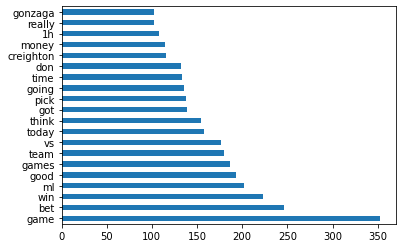

In [20]:
# create dataframe of cvec words
sportsbook_cvec_df = pd.DataFrame(sportsbook_cvec.todense(), columns=cvec.get_feature_names())
# plot common words
sportsbook_cvec_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

In [21]:
# look at top words for each subreddit
sub_filter1 = df['subreddit'] == 0

In [22]:
# create dfsports cvec 
dfs_cvec = cvec.fit_transform(df[sub_filter1]['body'])

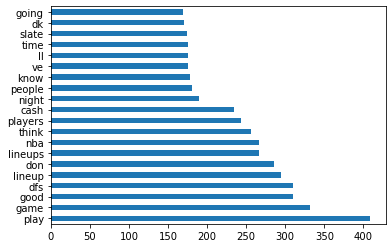

In [23]:
# create dataframe of cvec words
dfs_cvec_df = pd.DataFrame(dfs_cvec.todense(), columns=cvec.get_feature_names())
# plot common words
dfs_cvec_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

In [24]:
# create list of top 30 words for each subreddit then check for words in each
s = sportsbook_cvec_df.sum()
df1 = pd.DataFrame(zip(s,sportsbook_cvec_df.columns))

In [25]:
df1.sort_values(by=0, ascending=False, inplace=True)

In [26]:
df1[1].head(30).tolist()

['game',
 'bet',
 'win',
 'ml',
 'good',
 'games',
 'team',
 'vs',
 'today',
 'think',
 'got',
 'pick',
 'going',
 'time',
 'don',
 'creighton',
 'money',
 '1h',
 'really',
 'gonzaga',
 'michigan',
 'picks',
 'line',
 've',
 'odds',
 'record',
 'half',
 'points',
 'way',
 'houston']

In [27]:
# create function to look at top words in both subreddits
def create_list(df):
    # sum cvec
    s = df.sum()
    # zip sums and columns to dataframe
    df1 = pd.DataFrame(zip(s,df.columns))
    #sort new dataframe
    df1.sort_values(by=0, ascending=False, inplace=True)
    # return word column as list 
    return df1[1].head(50).tolist()

In [28]:
create_list(sportsbook_cvec_df)

['game',
 'bet',
 'win',
 'ml',
 'good',
 'games',
 'team',
 'vs',
 'today',
 'think',
 'got',
 'pick',
 'going',
 'time',
 'don',
 'creighton',
 'money',
 '1h',
 'really',
 'gonzaga',
 'michigan',
 'picks',
 'line',
 've',
 'odds',
 'record',
 'half',
 'points',
 'way',
 'houston',
 'won',
 'oregon',
 'stipe',
 'hit',
 'play',
 'parlay',
 'live',
 'right',
 'teams',
 'let',
 'fuck',
 'betting',
 'make',
 'll',
 'better',
 'day',
 'ucla',
 'best',
 'alabama',
 'know']

In [29]:
# create function to find commom words among top 50 words for each subreddit
def find_common_words(df1,df2):
    list1 = create_list(df1)
    list2 = create_list(df2)
    common_words_list = []
    for word in list1:
        if word in list2:
            common_words_list.append(word)
    return common_words_list

In [30]:
common_words_list = find_common_words(sportsbook_cvec_df, dfs_cvec_df)

In [31]:
common_words_list

['game',
 'win',
 'good',
 'games',
 'think',
 'got',
 'going',
 'time',
 'don',
 'money',
 'really',
 've',
 'points',
 'won',
 'play',
 'right',
 'make',
 'll',
 'best',
 'know']

In [32]:
# add common words to custom stop words list
for word in common_words_list:
    custom_stop_words.append(word)

In [33]:
# check output 
custom_stop_words

['cant',
 'me',
 'forty',
 'them',
 'describe',
 'none',
 'every',
 'anyone',
 'down',
 'this',
 'who',
 'whom',
 'are',
 'nothing',
 'twenty',
 'whenever',
 'seem',
 'ever',
 'amoungst',
 'so',
 'some',
 'hasnt',
 'too',
 'hereby',
 'sixty',
 'her',
 'do',
 'yet',
 'anyway',
 'everywhere',
 'get',
 'next',
 'to',
 'with',
 'made',
 'four',
 'thereby',
 'whither',
 'along',
 'cry',
 'through',
 'were',
 'well',
 'de',
 'back',
 'within',
 'besides',
 'same',
 'moreover',
 'whereby',
 'become',
 'third',
 'of',
 'still',
 'thereafter',
 'they',
 'his',
 'eg',
 'am',
 'else',
 'whereafter',
 'at',
 'sometimes',
 'keep',
 'first',
 'only',
 'thence',
 'is',
 'five',
 'sincere',
 'behind',
 'had',
 'indeed',
 'where',
 'whereupon',
 'latter',
 'has',
 'once',
 'amount',
 'myself',
 'somewhere',
 'themselves',
 'if',
 'under',
 'meanwhile',
 'or',
 'among',
 'six',
 'then',
 'what',
 'couldnt',
 'from',
 'enough',
 'until',
 'such',
 'above',
 'top',
 'eleven',
 'nor',
 'while',
 'should',


## Note:
By identifing common words list, I add these words to stop words list to try and improve model performance.  Will create custom word list .py file to easily import stop words list for future modeling.

In [44]:
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

In [48]:
lemmatizer = WordNetLemmatizer()

In [49]:
tokenizer = RegexpTokenizer(r'\w+')

In [53]:
test = tokenizer.tokenize(df['body'][0])
test

['fuck', 'it', 'o64', '5', '1H']

In [54]:
[lemmatizer.lemmatize(word) for word in test]

['fuck', 'it', 'o64', '5', '1H']

In [55]:
def lem(li):
    tokenizer = RegexpTokenizer(r'\w+')
    token_list = tokenizer.tokenize(li.lower())
    lem_list = [lemmatizer.lemmatize(word) for word in token_list]                          
    return lem_list

In [57]:
df['body'] = df['body'].map(lem)

In [58]:
df['body'] = df['body'].apply(', '.join)

In [59]:
df.head()

,subreddit,body,created_utc,author,submission_title
0,1,"fuck, it, o64, 5, 1h",1616963381,dummyacct321,ncaabb_daily_discussion_32821_sunday
1,1,"look, at, this",1616963365,jtcarl,2021_mlb_betting_primer
2,1,"toronto, been, baiting, everyone, all, week, i...",1616963335,hoooesay,nba_daily_discussion_32821_sunday
3,1,"fuck, michigan, but, today, they, make, me, mo...",1616963310,Dont_Carry_it_All,ncaabb_daily_discussion_32821_sunday
4,1,"follow, if, you, feel, like, it",1616963299,Feardamoo,which_is_the_worst_trend_on_sportsbook


In [62]:
# check body for numbers
for word in df['body'][0]:

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [36]:
# next step is to create class for common words list to be able to import in next modeling attempt

In [37]:
class Global_stop_words:
    def __init__(self, title, ls):
        self.title = title
        self.ls = ls

In [38]:
custom_stop_words = ['from', 'fire', 'amoungst', 'ours', 'mill', 'except', 'whither', 'or', 'each', 'below', 
                     'myself', 'whereby', 'her', 'seems', 'has', 'herself', 'if', 'hasnt', 'beforehand', 'his', 
                     'this', 'beside', 'system', 'might', 'many', 'cry', 'someone', 'off', 'yourselves', 'we', 
                     'four', 'else', 'because', 'something', 'go', 'twelve', 'back', 'done', 'was', 'itself', 'some', 
                     'becomes', 'against', 'hundred', 'con', 'down', 'him', 'thereby', 'nowhere', 'towards', 'throughout', 
                     'should', 'me', 'whether', 'five', 'sincere', 'which', 'during', 'part', 'toward', 'them', 'one', 'as', 
                     'still', 'thereafter', 'couldnt', 'thence', 'side', 'amount', 'may', 'others', 'us', 'nothing', 'are', 
                     'everyone', 'is', 'amongst', 'another', 'a', 'both', 'i', 'fifteen', 'also', 'whence', 'either', 'than',
                     'there', 'always', 'detail', 'into', 'call', 'more', 'un', 'namely', 'twenty', 'up', 'seem', 'anyhow', 
                     'beyond', 'out', 'how', 'hence', 'before', 'between', 'that', 'sometime', 'seeming', 'already', 
                     'together', 'please', 'your', 'indeed', 'serious', 'whom', 'somewhere', 'had', 'being', 'de', 'whose', 
                     'in', 'front', 'whereupon', 'first', 'several', 'through', 'otherwise', 'too', 'within', 'under', 
                     'therein', 'hers', 'least', 'only', 'forty', 'ever', 'their', 'such', 'however', 'whoever', 'whatever', 
                     'top', 'thru', 'of', 'meanwhile', 'anyway', 'am', 'enough', 'cannot', 'found', 'give', 'who', 'hereupon',
                     'until', 'our', 'about', 'bill', 'but', 'via', 'very', 'thick', 'be', 'somehow', 'anyone', 'nevertheless', 
                     'could', 'therefore', 'all', 'alone', 'three', 'latter', 'per', 'without', 'everything', 'himself', 'becoming', 
                     'where', 'by', 'never', 'can', 'along', 'since', 'bottom', 'yours', 'whole', 'now', 'mostly', 'third', 'perhaps',
                     'describe', 'have', 'besides', 'empty', 'often', 'less', 'ten', 'across', 'at', 'yet', 'eg', 'eight', 'herein',
                     'over', 'thereupon', 'afterwards', 'must', 'etc', 'keep', 'almost', 'then', 'find', 'other', 'every', 'none',
                     'among', 'move', 'thin', 'moreover', 'with', 'take', 'anything', 'eleven', 'full', 'it', 'further', 'its', 'thus',
                     'last', 'fifty', 'whereafter', 'ltd', 'themselves', 'few', 'those', 'seemed', 'nobody', 'to', 'will', 'after',
                     'so', 'six', 'not', 'when', 'latterly', 'sixty', 'nor', 'cant', 'though', 'would', 'were', 'no', 'onto', 'the', 
                     'ourselves', 'do', 'became', 'he', 'although', 'an', 'made', 'whereas', 'put', 'neither', 'nine', 'well', 'upon', 
                     're', 'due', 'even', 'my', 'next', 'inc', 'sometimes', 'why', 'again', 'been', 'they', 'anywhere', 'noone', 
                     'everywhere', 'yourself', 'what', 'formerly', 'while', 'much', 'wherein', 'whenever', 'interest', 'any', 'elsewhere',
                     'become', 'on', 'for', 'own', 'these', 'two', 'above', 'see', 'wherever', 'mine', 'name', 'ie', 'former', 'hereby',
                     'same', 'and', 'most', 'co', 'around', 'she', 'rather', 'here', 'hereafter', 'show', 'you', 'fill', 'get', 'behind',
                     'once', 'https', 'lol', 'just', 'like', 'com', 'game', 'win', 'good', 'games', 'think', 'got', 'going', 'time', 'don', 'money',
                     'really', 've', 'points', 'won', 'play', 'right', 'make', 'll', 'best', 'know']

In [39]:
test_list = Global_stop_words(title='test_list',ls=custom_stop_words)

In [40]:
test_list.ls

['from',
 'fire',
 'amoungst',
 'ours',
 'mill',
 'except',
 'whither',
 'or',
 'each',
 'below',
 'myself',
 'whereby',
 'her',
 'seems',
 'has',
 'herself',
 'if',
 'hasnt',
 'beforehand',
 'his',
 'this',
 'beside',
 'system',
 'might',
 'many',
 'cry',
 'someone',
 'off',
 'yourselves',
 'we',
 'four',
 'else',
 'because',
 'something',
 'go',
 'twelve',
 'back',
 'done',
 'was',
 'itself',
 'some',
 'becomes',
 'against',
 'hundred',
 'con',
 'down',
 'him',
 'thereby',
 'nowhere',
 'towards',
 'throughout',
 'should',
 'me',
 'whether',
 'five',
 'sincere',
 'which',
 'during',
 'part',
 'toward',
 'them',
 'one',
 'as',
 'still',
 'thereafter',
 'couldnt',
 'thence',
 'side',
 'amount',
 'may',
 'others',
 'us',
 'nothing',
 'are',
 'everyone',
 'is',
 'amongst',
 'another',
 'a',
 'both',
 'i',
 'fifteen',
 'also',
 'whence',
 'either',
 'than',
 'there',
 'always',
 'detail',
 'into',
 'call',
 'more',
 'un',
 'namely',
 'twenty',
 'up',
 'seem',
 'anyhow',
 'beyond',
 'out',
